In [59]:
import pandas as pd
import matplotlib.pyplot as plt

customers_df =  pd.read_csv('/content/drive/MyDrive/ml colab/customers.csv')
transactions_df = pd.read_csv('/content/drive/MyDrive/ml colab/transactions_train.csv')
articles_df = pd.read_csv('/content/drive/MyDrive/ml colab/articles.csv')

Customer Info:

In [60]:
display(customers_df.head())
display(customers_df.info())
display(customers_df.nunique())

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


None

customer_id               1371980
FN                              1
Active                          1
club_member_status              3
fashion_news_frequency          4
age                            84
postal_code                352899
dtype: int64

In [61]:
#plt.hist(customers_df.Active, bins=2)
customers_df.Active.nunique()

1

Transaction info:

In [62]:
display(transactions_df.head())
display(transactions_df.info())
display(transactions_df.nunique())

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB


None

t_dat                   734
customer_id         1362281
article_id           104547
price                  9857
sales_channel_id          2
dtype: int64

Articles:

In [63]:
display(articles_df.head())
display(articles_df.info())
display(articles_df.nunique())

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,3,Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,1,Dusty Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,4,Dark,5,Black,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,3,Light,9,White,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

None

article_id                      105542
product_code                     47224
prod_name                        45875
product_type_no                    132
product_type_name                  131
product_group_name                  19
graphical_appearance_no             30
graphical_appearance_name           30
colour_group_code                   50
colour_group_name                   50
perceived_colour_value_id            8
perceived_colour_value_name          8
perceived_colour_master_id          20
perceived_colour_master_name        20
department_no                      299
department_name                    250
index_code                          10
index_name                          10
index_group_no                       5
index_group_name                     5
section_no                          57
section_name                        56
garment_group_no                    21
garment_group_name                  21
detail_desc                      43404
dtype: int64

Exploring the data:

In [64]:
def plot_hist(df, column):
    plt.hist(df[column])
    plt.show()

*Age Distribution of Customers:*

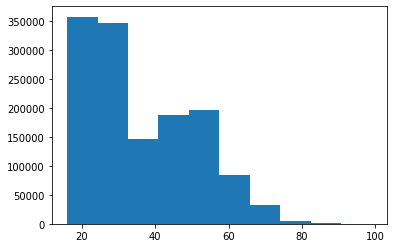

In [65]:
plot_hist(customers_df, 'age')

*Membership by Age:*

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8ec6519210>,
      dtype=object)

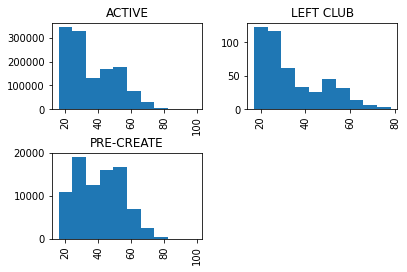

In [66]:
ageByMembership = customers_df.loc[customers_df['club_member_status']=='ACTIVE'].groupby('age')
customers_df['age'].hist(by=customers_df['club_member_status'])

*Transaction amts per customer:*

In [67]:
custTrans = pd.DataFrame(transactions_df.groupby(['customer_id']).price.sum())
custTrans.head()

,price
customer_id,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,0.648983
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,2.601932
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,0.704780
00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c5feb1ca5dff07c43e,0.060983
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,0.469695


Mean Purchase per Customer: 

In [68]:
custTrans.price.mean()

0.6493858271901057

Merge customer and transactions data

In [69]:
custTrans = transactions_df.merge(customers_df, on='customer_id', how='left')
display(custTrans.head())
display(custTrans.info())

,t_dat,customer_id,article_id,price,sales_channel_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,1.0,1.0,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2,1.0,1.0,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2,1.0,1.0,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...


<class 'pandas.core.frame.DataFrame'>
Int64Index: 31788324 entries, 0 to 31788323
Data columns (total 11 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   t_dat                   object 
 1   customer_id             object 
 2   article_id              int64  
 3   price                   float64
 4   sales_channel_id        int64  
 5   FN                      float64
 6   Active                  float64
 7   club_member_status      object 
 8   fashion_news_frequency  object 
 9   age                     float64
 10  postal_code             object 
dtypes: float64(4), int64(2), object(5)
memory usage: 2.8+ GB


None




*Get Transaction totals by time periods*


By month:

In [70]:
transTotals = pd.DataFrame(custTrans.groupby(['t_dat','customer_id']).price.sum())
display(transTotals.head())

price
t_dat      customer_id                                                 
2018-09-20 000058a12d5b43e67d225668fa1f8d618c13dc232df0cad...  0.081322
           00007d2de826758b65a93dd24ce629ed66842531df66993...  0.086356
           00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4c...  0.190593
           0008968c0d451dbc5a9968da03196fe20051965edde7413...  0.042847
           000aa7f0dc06cd7174389e76c9e132a67860c5f65f97069...  0.713051

In [71]:
transTotals.reset_index(inplace=True)

In [72]:
transTotals['t_dat'] = pd.to_datetime(transTotals['t_dat'])

In [73]:
transByMonth = pd.DataFrame(transTotals.groupby([transTotals['t_dat'].dt.month_name().rename('month')]).price.sum())

In [74]:
transByMonth.reset_index(inplace=True)
display(transByMonth)

,month,price
0,April,80633.472966
1,August,63676.345983
2,December,63800.107169
3,February,60221.098627
4,January,62243.564966
5,July,72750.136542
6,June,91703.776932
7,March,67823.224831
8,May,80503.196695
9,November,77855.408390


In [75]:
transByMonth['month'] = pd.DatetimeIndex(pd.to_datetime(transByMonth['month'], format='%B')).month
transByMonth 

,month,price
0,4,80633.472966
1,8,63676.345983
2,12,63800.107169
3,2,60221.098627
4,1,62243.564966
5,7,72750.136542
6,6,91703.776932
7,3,67823.224831
8,5,80503.196695
9,11,77855.408390


In [76]:
transByMonth.sort_values(by='month', inplace=True)
transByMonth

,month,price
4,1,62243.564966
3,2,60221.098627
7,3,67823.224831
0,4,80633.472966
8,5,80503.196695
6,6,91703.776932
5,7,72750.136542
1,8,63676.345983
11,9,84863.115746
10,10,78572.525203


In [77]:
monthDic = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
transByMonth['month'] = transByMonth['month'].replace(monthDic)
transByMonth = transByMonth.reset_index(drop=True)


In [78]:
transByMonth

,month,price
0,Jan,62243.564966
1,Feb,60221.098627
2,Mar,67823.224831
3,Apr,80633.472966
4,May,80503.196695
5,Jun,91703.776932
6,Jul,72750.136542
7,Aug,63676.345983
8,Sep,84863.115746
9,Oct,78572.525203


[Text(0.5, 1.0, 'Transactions by Month')]

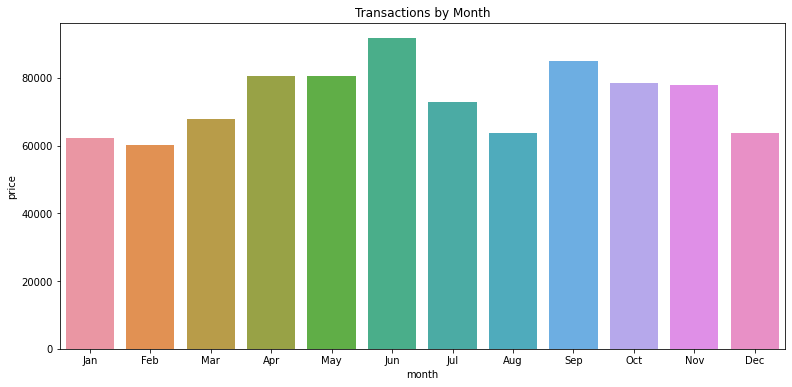

In [79]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(13, 6))

sns.barplot(x='month', y='price', data=transByMonth).set(Title='Transactions by Month')

By day of the week:

In [80]:
transTotals['t_dat'] = pd.to_datetime(transTotals['t_dat'])
transByDay = pd.DataFrame(transTotals.groupby([transTotals['t_dat'].dt.day_of_week.rename('DayOfWeek')]).price.sum())

In [81]:
transByDay

,price
DayOfWeek,
0,114883.797983
1,119471.791661
2,133354.508390
3,135167.938305
4,130138.643254
5,137059.126508
6,114570.167949


[Text(0.5, 1.0, 'Transactions by Day of the Week')]

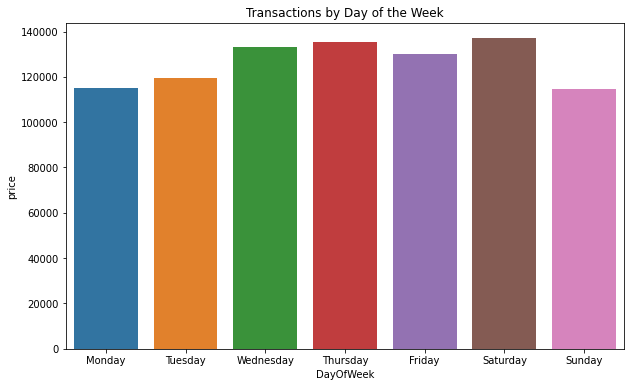

In [82]:
dayDic = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
transByDay = transByDay.reset_index()
fig, ax = plt.subplots(figsize=(10, 6))
transByDay['DayOfWeek'] = transByDay['DayOfWeek'].replace(dayDic)
transByDay = transByDay.reset_index(drop=True)

sns.barplot(x='DayOfWeek', y='price', data=transByDay).set(Title='Transactions by Day of the Week')

Explore purchases by items . . .

productAmts = custTrans['customer_id', 'age', 'price']
productAmts.head()

In [ ]:
productOneHot = pd.get_dummies(custTrans, columns = ['article_id'])
productOneHot.head()